In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
# reading the dataset and number of rows and columns
dataset = pd.read_csv('spambase.csv', header = None)
print(len(dataset.axes[0]))
print(len(dataset.axes[1]))
dataset.head()

4601
58


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# Assigning column names to the DataFrame
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']
dataset.columns = column_names
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
#checking null values
print(dataset.isnull().sum())
data = dataset.dropna()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
#checking duplicates and drops
print(data.duplicated().sum())
data = data.drop_duplicates()

391


In [6]:
# split dataset
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [7]:
# printing the spliting data
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3680
921
3680
921


In [8]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
#applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 44)

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

pca.fit(X_train)
explained_variance = pca.explained_variance_ratio_

In [10]:
#calculating the k value
import math
math.sqrt(len(y_test))

30.347981810987037

In [45]:
# cross validation to find the best n value
import warnings
warnings.filterwarnings("ignore", message="the default behavior of `mode`")

n_neighbors = range(1,10)
cv_scores = []

for n_value in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=n_value, p=2,metric='minkowski')
    scores = cross_val_score(model,X,y,cv=10)
    mean_score = scores.mean()
    cv_scores.append(scores.mean())
    print("K Value: ",n_value,";","mean accuracy: ",mean_score*100)
    
    
# Find the optimal value of k
optimal_k = n_neighbors[cv_scores.index(max(cv_scores))]
print("The optimal value of k is:", optimal_k)
    

K Value:  1 ; mean accuracy:  77.7006561865647
K Value:  2 ; mean accuracy:  76.48354812821601
K Value:  3 ; mean accuracy:  77.63541519142709
K Value:  4 ; mean accuracy:  76.76615682386819
K Value:  5 ; mean accuracy:  77.24458292026625
K Value:  6 ; mean accuracy:  76.00590095831564
K Value:  7 ; mean accuracy:  76.87518292970779
K Value:  8 ; mean accuracy:  75.96244630127931
K Value:  9 ; mean accuracy:  75.96246990511258
The optimal value of k is: 1


In [53]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=3,p=2, 
metric='minkowski')

In [54]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

[[529  35]
 [ 44 313]]


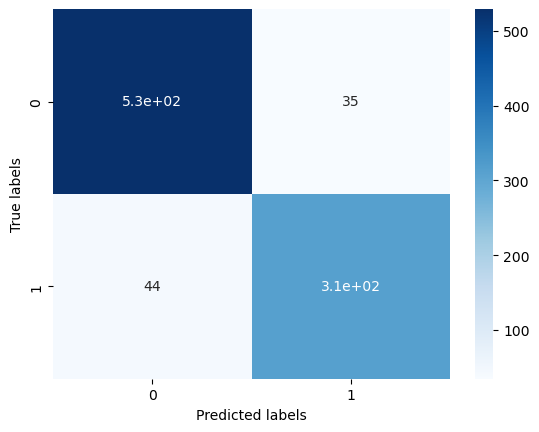

In [56]:
# Evaluating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [57]:
# Extract true positives, true negatives, false positives, and false negatives
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

True Positives (TP): 313
True Negatives (TN): 529
False Positives (FP): 35
False Negatives (FN): 44


In [58]:
# printing the evaluation Criteria
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("F1 Score: ",f1_score(y_test, y_pred))
print("Recall Score: ",recall_score(y_test, y_pred))
print("Precision Score: ",precision_score(y_test, y_pred))

Accuracy:  0.9142236699239956
F1 Score:  0.8879432624113476
Recall Score:  0.876750700280112
Precision Score:  0.8994252873563219


In [52]:
# evaluation report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       564
           1       0.89      0.88      0.88       357

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

